In [60]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Lodind data
df = pd.read_csv("House price prediction data set/House Price Prediction Dataset.csv")

In [62]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [35]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [36]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [51]:
X = df[['Area', 'YearBuilt','Bedrooms','Bathrooms','Floors']] 
y = df['Price']  

In [52]:
#Try degrees 1-5 and compare cv MSE 
degrees=[1,2,3,4,5]
cv_scores=[]

In [53]:
for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d, include_bias=False),
                          LinearRegression())
    # sklearn uses maximization, so we take negative MSE
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

In [54]:
for d , score in zip(degrees,cv_scores):
        print(f"Degree{d}->CV MSE : {score:.4f}")
    

Degree1->CV MSE : 76625558837.5425
Degree2->CV MSE : 76978629169.8365
Degree3->CV MSE : 78378078131.7457
Degree4->CV MSE : 84647364257.2296
Degree5->CV MSE : 86945025294.7372


In [55]:
# Pick best degree (lowest MSE), train-test evaluation
best_degree = degrees[int(np.argmin(cv_scores))]
print("Best degree:", best_degree)

Best degree: 1


In [56]:
# Train-test split with best degree
model = make_pipeline(PolynomialFeatures(degree=best_degree, include_bias=False),
                      LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linearregression', LinearRegression())])

In [57]:
# Predictions
y_pred = model.predict(X_test)

In [58]:
# Evaluation
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Test MSE: 78789724000.88458
R²: -0.01273663755401877


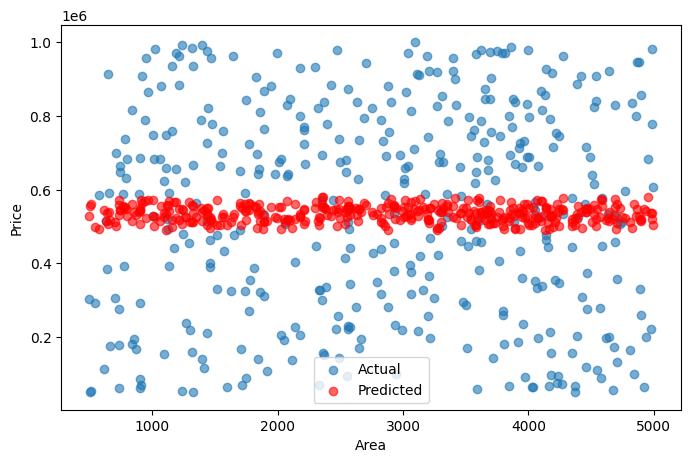

In [59]:
# Visualization (only works with 1 feature, so here we just plot Area vs Price)
plt.figure(figsize=(8,5))
plt.scatter(X_test['Area'], y_test, alpha=0.6, label="Actual")
plt.scatter(X_test['Area'], y_pred, color='red', alpha=0.6, label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()